In [4]:
library('keras')

In [5]:
mnist <- dataset_mnist ()

ERROR: Error: Your current architecture is 32bit; however, this version of Python was compiled for 64bit.
Please create a default virtual environment with `reticulate::virtualenv_create('r-reticulate')`.


In [4]:
names(mnist)

[1] "train" "test"

In [5]:
x_train <- mnist$train$x
g_train <- mnist$train$y
x_test <- mnist$test$x
g_test <- mnist$test$y
dim(x_train)
dim(x_test)

[1] 60000    28    28

[1] 10000    28    28

In [25]:
plt_df = reshape2::melt(mnist$train$x[20,,])
head(plt_df)

,Var1,Var2,value
,<int>,<int>,<int>
1,1,1,0
2,2,1,0
3,3,1,0
4,4,1,0
5,5,1,0
6,6,1,0


In [26]:
library('ggplot2')

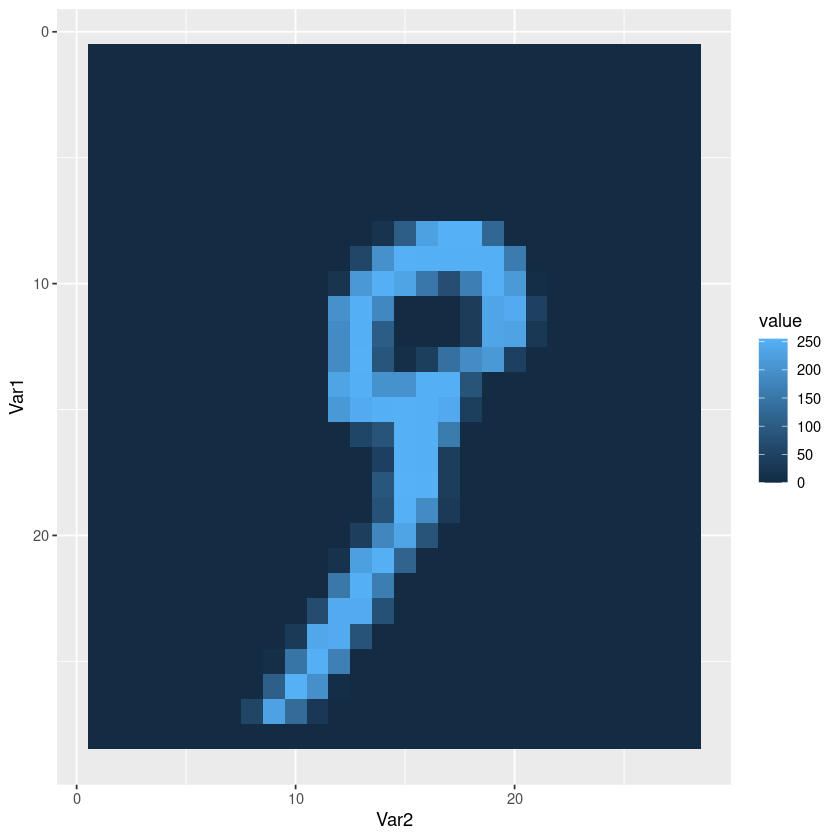

In [27]:
ggplot(data=plt_df,mapping=aes(x=Var2,y=Var1,fill=value))+geom_tile()+scale_y_reverse()

In [28]:
x_train <- array_reshape(x_train, c(nrow(x_train), 784))
x_test <- array_reshape(x_test, c(nrow(x_test), 784))
y_train <- to_categorical(g_train, 10)
y_test <- to_categorical(g_test, 10)

In [29]:
x_train <- x_train / 255
x_test <- x_test / 255

In [32]:
modelnn <- keras_model_sequential()
modelnn %>%
  layer_dense(units = 256, activation = "relu",
       input_shape = c(784)) %>%
  layer_dropout(rate = 0.4) %>%
  layer_dense(units = 128, activation = "relu") %>%
  layer_dropout(rate = 0.3) %>%
  layer_dense(units = 10, activation = "softmax")

In [33]:
summary(modelnn)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_5 (Dense)                    (None, 256)                     200960      
 dropout_3 (Dropout)                (None, 256)                     0           
 dense_4 (Dense)                    (None, 128)                     32896       
 dropout_2 (Dropout)                (None, 128)                     0           
 dense_3 (Dense)                    (None, 10)                      1290        
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [34]:
modelnn %>% compile(loss = "categorical_crossentropy",
    optimizer = optimizer_rmsprop(), metrics = c("accuracy")
  )

In [35]:
system.time(
  history <- modelnn %>%
    fit(x_train, y_train, epochs = 30, batch_size = 128,
        validation_split = 0.2)
)

   user  system elapsed 
120.222   6.390  33.622 

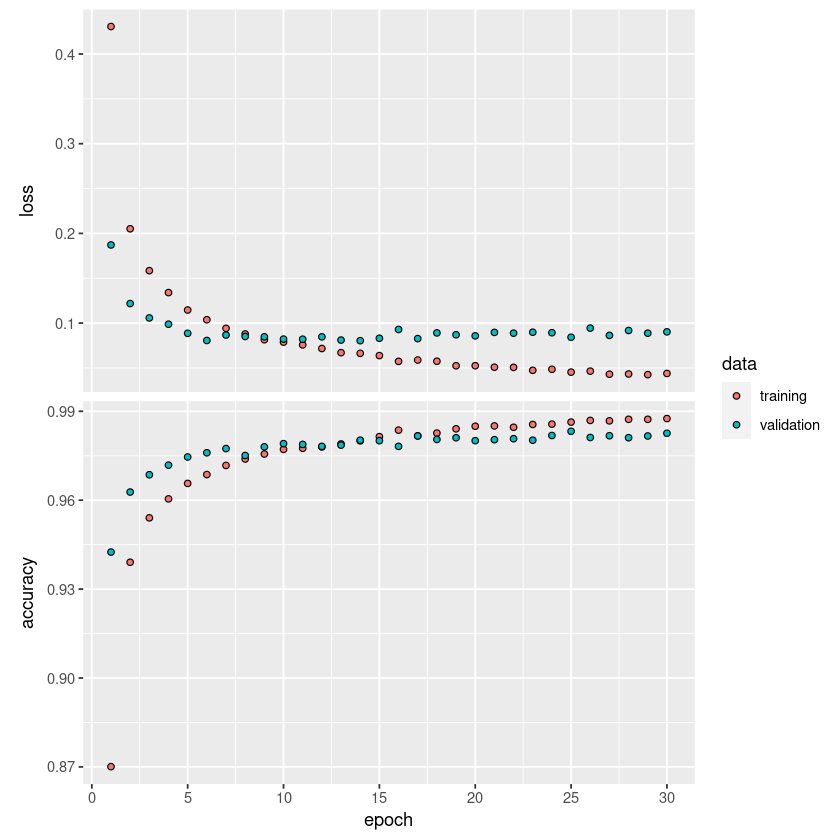

In [36]:
plot(history , smooth = FALSE)

In [38]:
accuracy <- function(pred, truth)
  mean(drop(as.numeric(pred)) == drop(truth))

In [40]:
summary(modelnn)

Model: "sequential_1"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 dense_5 (Dense)                    (None, 256)                     200960      
 dropout_3 (Dropout)                (None, 256)                     0           
 dense_4 (Dense)                    (None, 128)                     32896       
 dropout_2 (Dropout)                (None, 128)                     0           
 dense_3 (Dense)                    (None, 10)                      1290        
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


In [42]:
modelnn %>% predict(x_test) %>% head()

6.386637e-19,9.791517e-16,1.129378e-13,4.121779e-14,7.224402e-19,9.323469e-18,8.239543e-28,9.999999e-01,3.519039e-19,8.055954e-13
9.885565e-17,2.380784e-11,9.999999e-01,1.489810e-12,4.434496e-23,3.149963e-18,1.057590e-14,7.632090e-19,2.845563e-15,8.584266e-26
3.419702e-09,9.999952e-01,8.129630e-07,5.963159e-10,2.430966e-07,1.701237e-08,7.273183e-07,1.673339e-06,1.311898e-06,1.424963e-11
9.999997e-01,2.113651e-14,4.103225e-08,2.325739e-11,2.066230e-10,2.252888e-09,2.501270e-07,9.320518e-10,6.214585e-10,3.836621e-09
2.179593e-11,8.722264e-13,1.593141e-11,8.558256e-14,9.999996e-01,1.065855e-11,4.811461e-11,9.249863e-08,1.444112e-11,2.531188e-07
1.286126e-10,9.999989e-01,4.506625e-09,1.375732e-11,3.886058e-07,7.869654e-11,4.377287e-09,6.998795e-07,5.861874e-08,3.367783e-12


In [44]:
modelnn %>% predict(x_test) %>% k_argmax() %>% head(n=10)

tf.Tensor([7 2 1 0 4 1 4 9 5 9], shape=(10), dtype=int64)

In [46]:
modelnn %>% predict(x_test) %>% k_argmax() %>% accuracy(g_test)

[1] 0.983